In [ ]:
# http://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index

'''
Experimenting with some data from the Down Jones index for 6 months in 2011, on each stock. 

Ran an ANIMA model on one of them. 
'''

In [2]:
import pandas as pd


In [36]:
filename = 'C://Users/Tim/Downloads/dow_jones_index/dow_jones_index.data'

f=open(filename,"r")

In [37]:
dataDF = pd.read_csv(filename)

In [38]:
dataDF

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [29]:
dataDF['stock'].unique()

array(['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE',
       'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KRFT', 'KO', 'MCD',
       'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT',
       'XOM'], dtype=object)

In [23]:
dataDF['close']

0      16.42
1      15.97
2      15.79
3      16.13
4      17.14
       ...  
745    82.63
746    81.18
747    79.78
748    79.02
749    76.78
Name: close, Length: 750, dtype: object

In [40]:
dataDF['close'] = dataDF['close'].replace({'\$':''}, regex = True).astype(float)


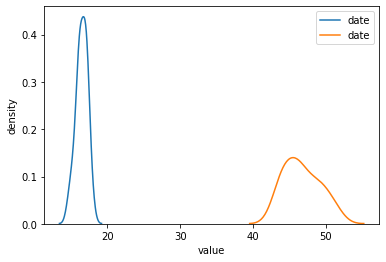

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# p_df = pd.DataFrame({"class": [1,1,2,2,1], "a": [2,3,2,3,2]})
sns.kdeplot(dataDF.loc[dataDF.stock == "AA"]['close'],label='date');
sns.kdeplot(dataDF.loc[dataDF.stock == "AXP"]['close'],label='date');

# beautifying the labels
plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [25]:
aaDF = dataDF.loc[dataDF['stock'] == 'AA']

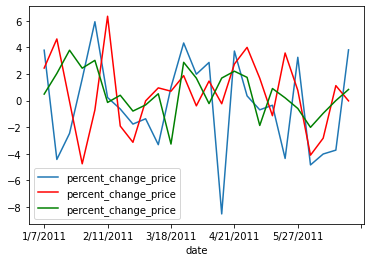

In [34]:
ax = plt.gca()
y_name = 'percent_change_price'

dataDF.loc[dataDF['stock'] == 'AA'].plot(x = 'date', y = y_name, ax = ax)
dataDF.loc[dataDF['stock'] == 'AXP'].plot(x = 'date', y = y_name, color = 'red', ax = ax)
dataDF.loc[dataDF['stock'] == 'IBM'].plot(x = 'date', y = y_name, color = 'green', ax = ax)

In [46]:
df_close = dataDF.loc[dataDF['stock'] == 'AA'] #['date', 'close']
df_close[['date', 'close']].set_index('date').rolling(5).mean()

,close
date,
1/7/2011,NaN
1/14/2011,NaN
1/21/2011,NaN
1/28/2011,NaN
2/4/2011,16.290
2/11/2011,16.480
2/18/2011,16.742
2/25/2011,16.920
3/4/2011,17.010


In [49]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

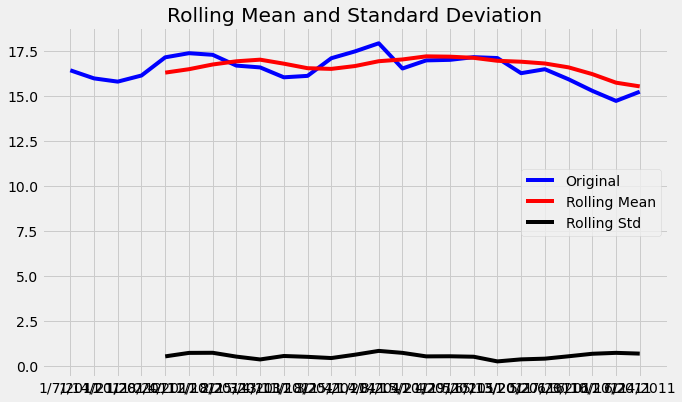

Results of dickey fuller test
Test Statistics                -2.437197
p-value                         0.131512
No. of lags used                9.000000
Number of observations used    15.000000
critical value (1%)            -3.964443
critical value (5%)            -3.084908
critical value (10%)           -2.681814
dtype: float64


In [52]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(5).mean()
    rolstd = timeseries.rolling(5).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
df_close = dataDF.loc[dataDF['stock'] == 'AA'][['date', 'close']].set_index('date')
test_stationarity(df_close)

In [53]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [57]:
df_close = dataDF.loc[dataDF['stock'] == 'AA'][['date', 'close']].set_index('date')
df_log = np.log(df_close)

In [66]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

In [67]:
test_data

,close
date,
6/10/2011,2.726545
6/17/2011,2.689207
6/24/2011,2.723267


In [68]:
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                   18
Model:                 ARIMA(3, 1, 2)   Log Likelihood                  38.074
Method:                       css-mle   S.D. of innovations              0.026
Date:                Mon, 03 Aug 2020   AIC                            -62.148
Time:                        04:53:01   BIC                            -55.916
Sample:                             1   HQIC                           -61.289
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.182e-06      0.001      0.004      0.997      -0.002       0.002
ar.L1.D.close     0.3533      0.375      0.941      0.347      -0.382       1.089
ar.L2.D.close     0.0260      0.285     

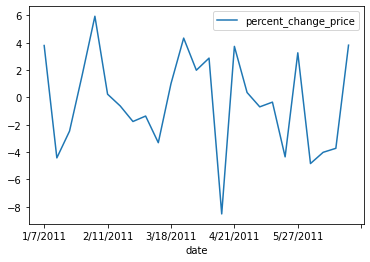

In [16]:
aaDF.plot(x = 'date', y = 'percent_change_price')

In [12]:
dataDF.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object